In [5]:
# IMPORTS

import pandas as pd
import numpy as np
import os


## Acquire

Data is collected from Data.World Wine Quality Dataset

In [6]:
# acquiring the red wine csv
df_red = pd.read_csv("winequality-red.csv")

In [7]:
# acquiring the white wine csv
df_white = pd.read_csv("winequality-white.csv")

In [8]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Prepare

* The red and white csv's should be combined into a single column thats states if the wine is red or white
* Column data types are appropriate
* Missing values are investigated and handled
* Outliers are investigated and handled

In [9]:
# need to add column to both df's that distinguish between red and white wine
df_red['color_type'] = 'red'

In [10]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [11]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [12]:
df_white['color_type'] = 'white'

In [13]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [14]:
df_white.shape

(4898, 13)

In [15]:
df_red.shape

(1599, 13)

In [16]:
df_merged = df_red.merge(df_white, how='outer')

In [17]:
df_merged.shape

(6497, 13)

In [18]:
df_merged.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red


In [19]:
df_merged.columns = df_merged.columns.str.replace(' ', '_')

In [20]:
df_merged.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red


In [21]:
df_merged.shape

(6497, 13)

In [22]:
import matplotlib.pyplot as plt
import pandas as pd


def check_columns(df, reports=False, graphs=False):
    """
    This function takes a pandas dataframe as input and returns
    a dataframe with information about each column in the dataframe. For
    each column, it returns the column name, the number of
    unique values in the column, the unique values themselves,
    the number of null values in the column, the proportion of null values,
    the data type of the column, and the range of the column if it is float or int. The resulting dataframe is sorted by the
    'Number of Unique Values' column in ascending order.

    Args:
    - df: pandas dataframe

    Returns:
    - pandas dataframe
    """
    print(f"Total rows: {df.shape[0]}")
    print(f"Total columns: {df.shape[1]}")
    if reports == True:
        describe = df.describe().round(2)
        pd.DataFrame(describe)
        print(describe)
    if graphs == True:
        df.hist(bins=20, figsize=(10, 10))
        plt.show()
    data = []
    # Loop through each column in the dataframe
    for column in df.columns:
        # Append the column name, number of unique values, unique values, number of null values, proportion of null values, and data type to the data list
        if df[column].dtype in ["float64", "int64"]:
            data.append(
                [
                    column,
                    df[column].dtype,
                    df[column].nunique(),
                    df[column].isna().sum(),
                    df[column].isna().mean().round(5),
                    df[column].unique(),
                    df[column].describe()[["min", "max", "mean"]].values,
                ]
            )
        else:
            data.append(
                [
                    column,
                    df[column].dtype,
                    df[column].nunique(),
                    df[column].isna().sum(),
                    df[column].isna().mean().round(5),
                    df[column].unique(),
                    None,
                ]
            )
    # Create a pandas dataframe from the data list, with column names 'Column Name', 'Number of Unique Values', 'Unique Values', 'Number of Null Values', 'Proportion of Null Values', 'dtype', and 'Range' (if column is float or int)
    # Sort the resulting dataframe by the 'Number of Unique Values' column in ascending order
    return pd.DataFrame(
        data,
        columns=[
            "col_name",
            "dtype",
            "num_unique",
            "num_null",
            "pct_null",
            "unique_values",
            "range (min, max, mean)",
        ],
    )

In [23]:
check_columns(df_merged)

Total rows: 6497
Total columns: 13


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,fixed_acidity,float64,106,0,0.0,"[7.4, 7.8, 11.2, 7.9, 7.3, 7.5, 6.7, 5.6, 8.9,...","[3.8, 15.9, 7.215307064799138]"
1,volatile_acidity,float64,187,0,0.0,"[0.7, 0.88, 0.76, 0.28, 0.66, 0.6, 0.65, 0.58,...","[0.08, 1.58, 0.3396659996921656]"
2,citric_acid,float64,89,0,0.0,"[0.0, 0.04, 0.56, 0.06, 0.02, 0.36, 0.08, 0.29...","[0.0, 1.66, 0.3186332153301524]"
3,residual_sugar,float64,316,0,0.0,"[1.9, 2.6, 2.3, 1.8, 1.6, 1.2, 2.0, 6.1, 3.8, ...","[0.6, 65.8, 5.443235339387409]"
4,chlorides,float64,214,0,0.0,"[0.076, 0.098, 0.092, 0.075, 0.069, 0.065, 0.0...","[0.009, 0.611, 0.05603386178236109]"
5,free_sulfur_dioxide,float64,135,0,0.0,"[11.0, 25.0, 15.0, 17.0, 13.0, 9.0, 16.0, 52.0...","[1.0, 289.0, 30.525319378174544]"
6,total_sulfur_dioxide,float64,276,0,0.0,"[34.0, 67.0, 54.0, 60.0, 40.0, 59.0, 21.0, 18....","[6.0, 440.0, 115.7445744189626]"
7,density,float64,998,0,0.0,"[0.9978, 0.9968, 0.997, 0.998, 0.9964, 0.9946,...","[0.98711, 1.03898, 0.9946966338309989]"
8,pH,float64,108,0,0.0,"[3.51, 3.2, 3.26, 3.16, 3.3, 3.39, 3.36, 3.35,...","[2.72, 4.01, 3.2185008465445586]"
9,sulphates,float64,111,0,0.0,"[0.56, 0.68, 0.65, 0.58, 0.46, 0.47, 0.57, 0.8...","[0.22, 2.0, 0.5312682776666153]"


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
def get_fences(df, col, k=1.5) -> tuple:
    '''
    get fences will calculate the upper and lower fence
    based on the inner quartile range of a single Series
    
    return: lower_bound and upper_bound, two floats
    '''
    q3 = df[col].quantile(0.75)
    q1 = df[col].quantile(0.25)
    iqr = q3 - q1
    upper_bound = q3 + (k * iqr)
    lower_bound = q1 - (k * iqr)
    return lower_bound, upper_bound

def report_outliers(df, k=1.5) -> None:
    '''
    report_outliers will print a subset of each continuous
    series in a dataframe (based on numeric quality and n>20)
    and will print out results of this analysis with the fences
    in places
    '''
    num_df = df.select_dtypes('number')
    for col in num_df:
        if len(num_df[col].value_counts()) > 20:
            lower_bound, upper_bound = get_fences(df,col, k=k)
            print(f'Outliers for Col {col}:')
            print('lower: ', lower_bound, 'upper: ', upper_bound)
            print(df[col][(
                df[col] > upper_bound) | (df[col] < lower_bound)])
            
            print('----------')

In [26]:
report_outliers(df_merged)

Outliers for Col fixed_acidity:
lower:  4.450000000000001 upper:  9.65
4       11.2
56      10.2
74       9.7
114     10.1
197     11.5
        ... 
5858     3.8
6045     4.4
6387     4.4
6388     3.9
6446     4.4
Name: fixed_acidity, Length: 357, dtype: float64
----------
Outliers for Col volatile_acidity:
lower:  -0.024999999999999994 upper:  0.655
0       0.700
1       0.700
2       0.880
3       0.760
5       0.660
        ...  
6249    0.695
6300    0.690
6301    0.690
6391    0.785
6416    0.760
Name: volatile_acidity, Length: 377, dtype: float64
----------
Outliers for Col citric_acid:
lower:  0.03999999999999998 upper:  0.6000000000000001
0       0.00
1       0.00
2       0.00
5       0.00
7       0.00
        ... 
6391    0.00
6407    0.67
6416    0.01
6476    0.00
6477    0.02
Name: citric_acid, Length: 509, dtype: float64
----------
Outliers for Col residual_sugar:
lower:  -7.6499999999999995 upper:  17.549999999999997
1599    20.70
1600    20.70
1613    19.25
1637    17.95


(array([  30.,  216.,    0., 2138.,    0., 2836., 1079.,    0.,  193.,
           5.]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <BarContainer object of 10 artists>)

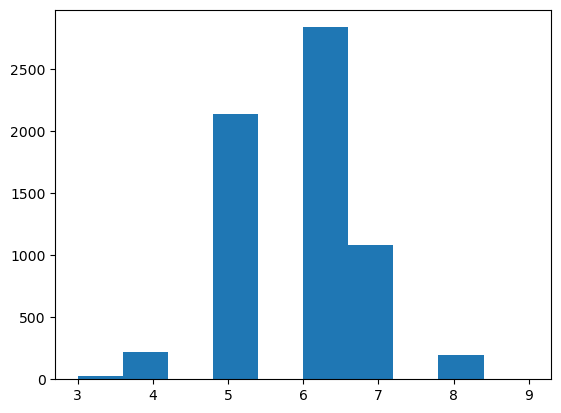

In [27]:
# quality is our target variable
plt.hist(df_merged['quality'])

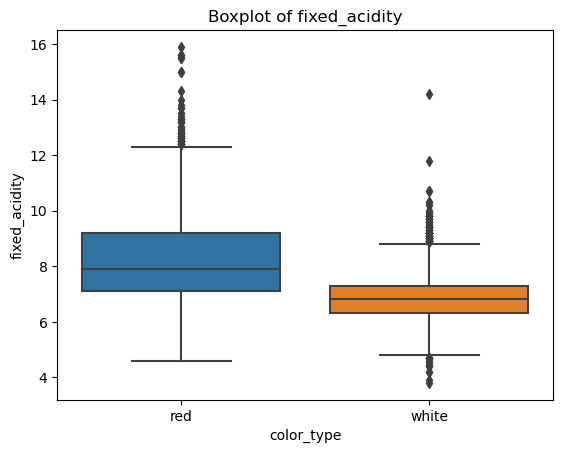

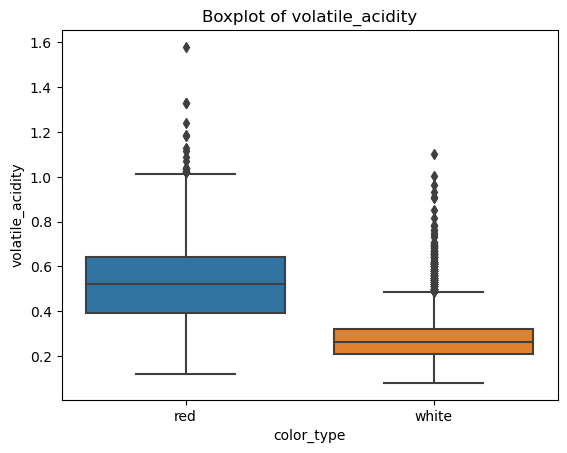

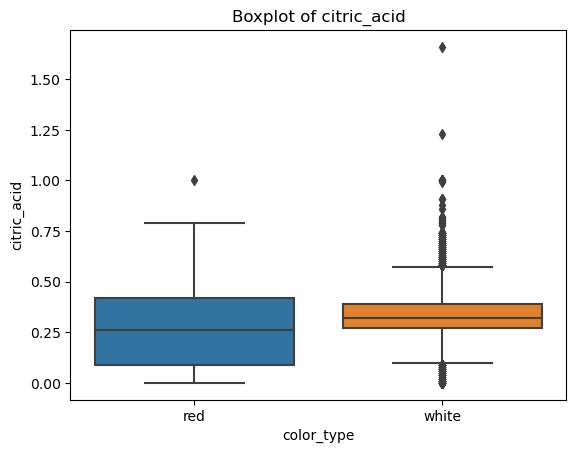

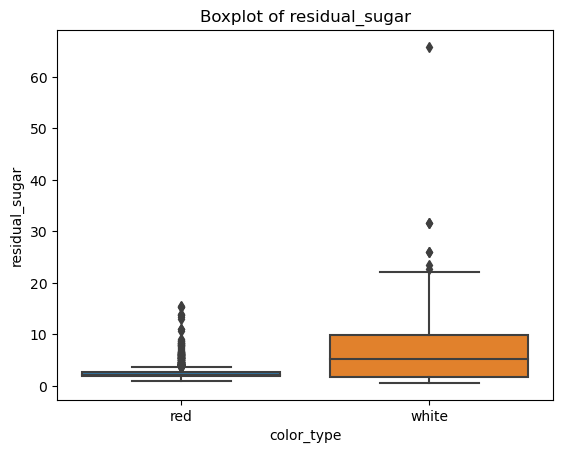

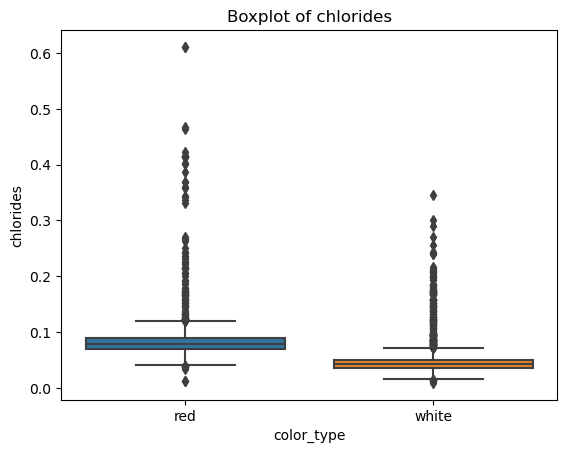

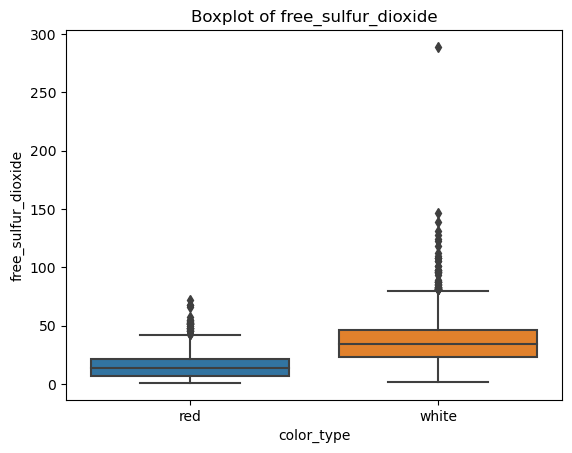

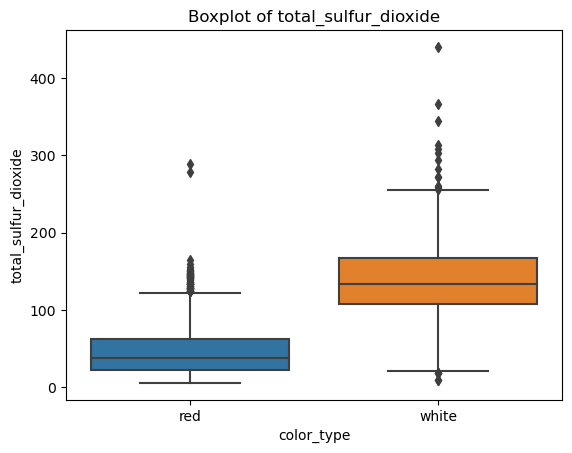

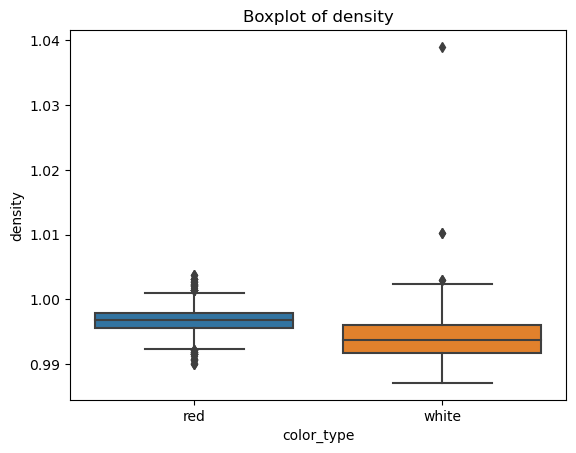

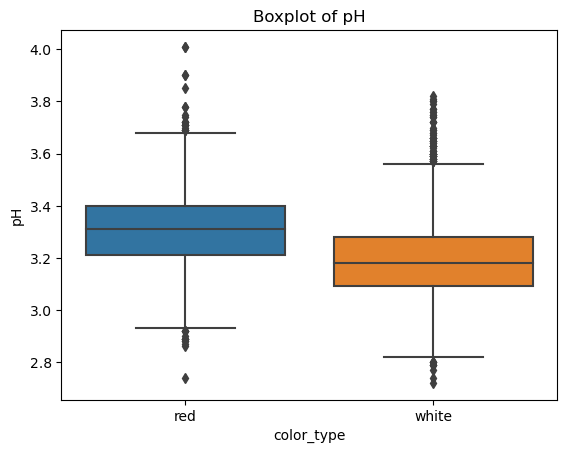

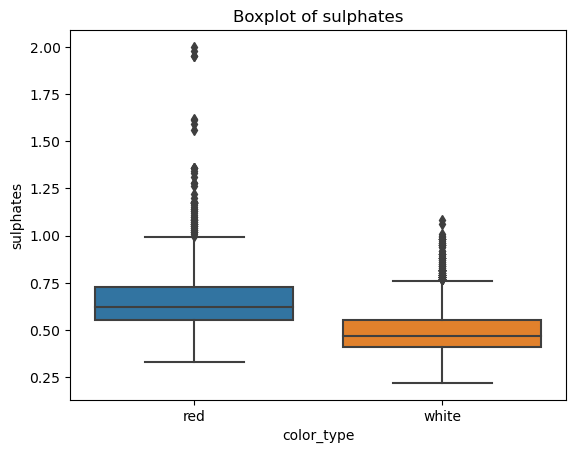

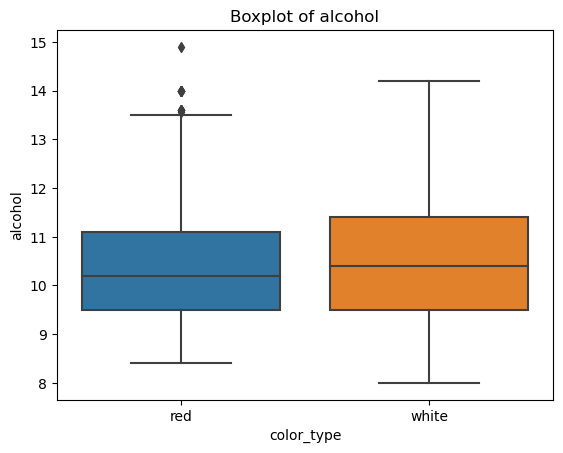

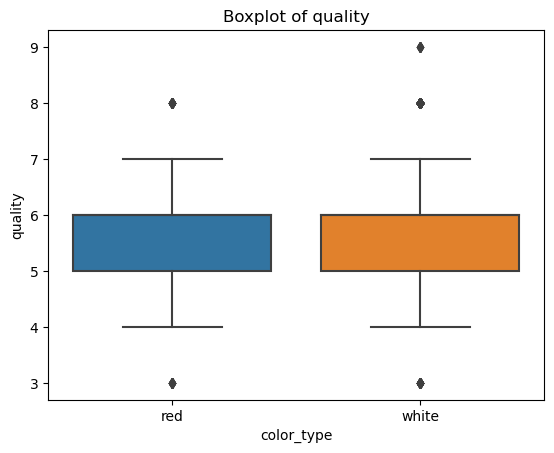

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [28]:
for col in df_merged:
    sns.boxplot(data=df_merged, x='color_type', y= col)
    plt.title(f'Boxplot of {col}')
    plt.show()

Total rows: 6497
Total columns: 13


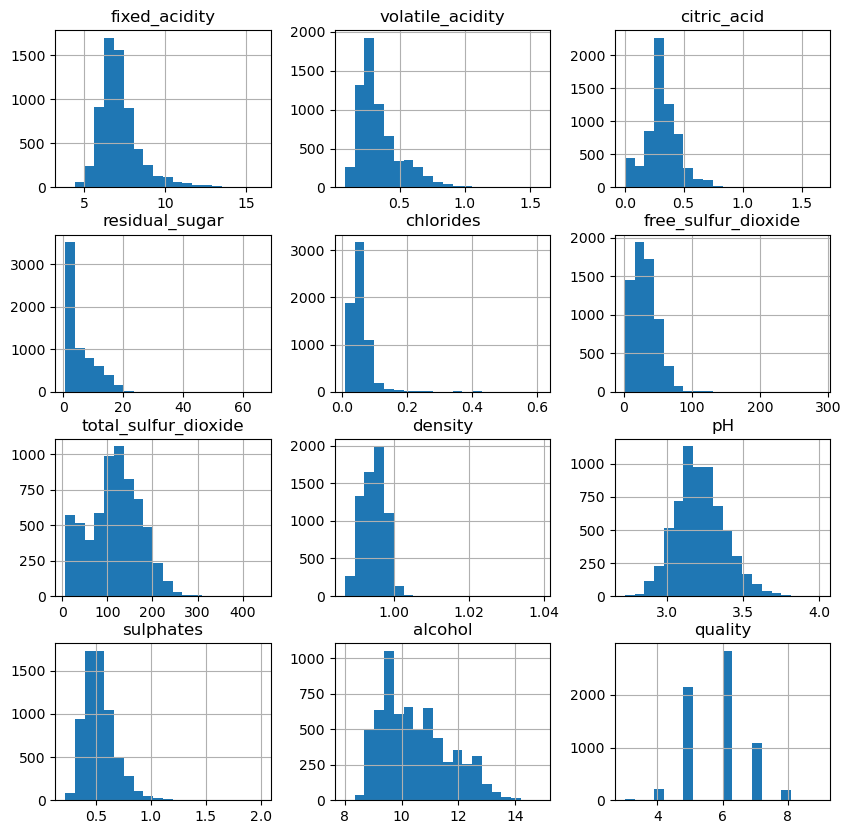

,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,fixed_acidity,float64,106,0,0.0,"[7.4, 7.8, 11.2, 7.9, 7.3, 7.5, 6.7, 5.6, 8.9,...","[3.8, 15.9, 7.215307064799138]"
1,volatile_acidity,float64,187,0,0.0,"[0.7, 0.88, 0.76, 0.28, 0.66, 0.6, 0.65, 0.58,...","[0.08, 1.58, 0.3396659996921656]"
2,citric_acid,float64,89,0,0.0,"[0.0, 0.04, 0.56, 0.06, 0.02, 0.36, 0.08, 0.29...","[0.0, 1.66, 0.3186332153301524]"
3,residual_sugar,float64,316,0,0.0,"[1.9, 2.6, 2.3, 1.8, 1.6, 1.2, 2.0, 6.1, 3.8, ...","[0.6, 65.8, 5.443235339387409]"
4,chlorides,float64,214,0,0.0,"[0.076, 0.098, 0.092, 0.075, 0.069, 0.065, 0.0...","[0.009, 0.611, 0.05603386178236109]"
5,free_sulfur_dioxide,float64,135,0,0.0,"[11.0, 25.0, 15.0, 17.0, 13.0, 9.0, 16.0, 52.0...","[1.0, 289.0, 30.525319378174544]"
6,total_sulfur_dioxide,float64,276,0,0.0,"[34.0, 67.0, 54.0, 60.0, 40.0, 59.0, 21.0, 18....","[6.0, 440.0, 115.7445744189626]"
7,density,float64,998,0,0.0,"[0.9978, 0.9968, 0.997, 0.998, 0.9964, 0.9946,...","[0.98711, 1.03898, 0.9946966338309989]"
8,pH,float64,108,0,0.0,"[3.51, 3.2, 3.26, 3.16, 3.3, 3.39, 3.36, 3.35,...","[2.72, 4.01, 3.2185008465445586]"
9,sulphates,float64,111,0,0.0,"[0.56, 0.68, 0.65, 0.58, 0.46, 0.47, 0.57, 0.8...","[0.22, 2.0, 0.5312682776666153]"


In [29]:
# Univariate exploration (before split)

check_columns(df_merged, graphs=True)

## Explore

In [30]:
from sklearn.model_selection import train_test_split

In [87]:
# Split before bivariate exploring
# Switched to random state 123 to match Zac's
def split_data(df):
    '''
    split continuouse data into train, validate, test; No target variable

    argument: df

    return: train, validate, test
    '''

    train_val, test = train_test_split(df,
                                   train_size=0.8,
                                   random_state=123,
                                   )
    train, validate = train_test_split(train_val,
                                   train_size=0.75,
                                   random_state=123,
                                   )
    
    print(f'Train: {len(train)/len(df)}')
    print(f'Validate: {len(validate)/len(df)}')
    print(f'Test: {len(test)/len(df)}')
    

    return train, validate, test

In [88]:
train, validate, test = split_data(df_merged)

Train: 0.5998152993689395
Validate: 0.20009235031553024
Test: 0.20009235031553024


In [89]:
check_columns(train)

Total rows: 3897
Total columns: 13


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,fixed_acidity,float64,100,0,0.0,"[7.4, 6.4, 8.2, 5.9, 6.5, 8.6, 9.0, 13.3, 6.1,...","[3.8, 15.6, 7.234128817038748]"
1,volatile_acidity,float64,167,0,0.0,"[0.23, 0.155, 0.4, 0.37, 0.395, 0.28, 0.58, 0....","[0.08, 1.58, 0.34009494482935587]"
2,citric_acid,float64,87,0,0.0,"[0.25, 0.34, 0.36, 0.13, 0.33, 0.52, 0.3, 0.15...","[0.0, 1.66, 0.3189171157300488]"
3,residual_sugar,float64,286,0,0.0,"[1.4, 2.3, 4.2, 1.0, 2.4, 16.3, 15.7, 11.3, 2....","[0.6, 65.8, 5.535052604567616]"
4,chlorides,float64,185,0,0.0,"[0.049, 0.045, 0.032, 0.034, 0.056, 0.038, 0.0...","[0.012, 0.61, 0.05623043366692329]"
5,free_sulfur_dioxide,float64,115,0,0.0,"[43.0, 73.5, 15.0, 17.0, 14.0, 51.0, 13.0, 9.0...","[1.0, 146.5, 30.737875288683604]"
6,total_sulfur_dioxide,float64,259,0,0.0,"[141.0, 214.0, 91.0, 93.0, 28.0, 133.0, 190.0,...","[6.0, 366.5, 115.73518090839107]"
7,density,float64,872,0,0.0,"[0.9934, 0.98988, 0.9906, 0.99362, 0.99924, 0....","[0.98711, 1.03898, 0.9947569540672312]"
8,pH,float64,103,0,0.0,"[3.42, 3.18, 3.26, 3.04, 3.62, 3.22, 3.11, 3.2...","[2.72, 3.9, 3.217834231460098]"
9,sulphates,float64,104,0,0.0,"[0.54, 0.61, 0.52, 0.32, 0.67, 0.41, 0.51, 0.4...","[0.22, 2.0, 0.5318783679753658]"


What does total_sulfer_dioxide and volitile acidity look like plotted?

<Axes: xlabel='total_sulfur_dioxide', ylabel='volatile_acidity'>

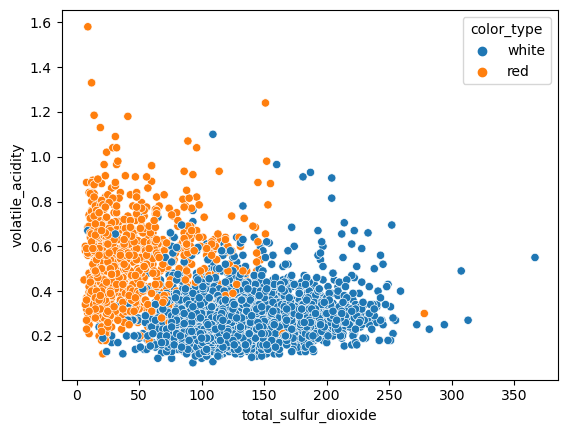

In [90]:
sns.scatterplot(train, x='total_sulfur_dioxide',y='volatile_acidity', hue= 'color_type')

What about fixed_acidity and sulphates?

<Axes: xlabel='fixed_acidity', ylabel='sulphates'>

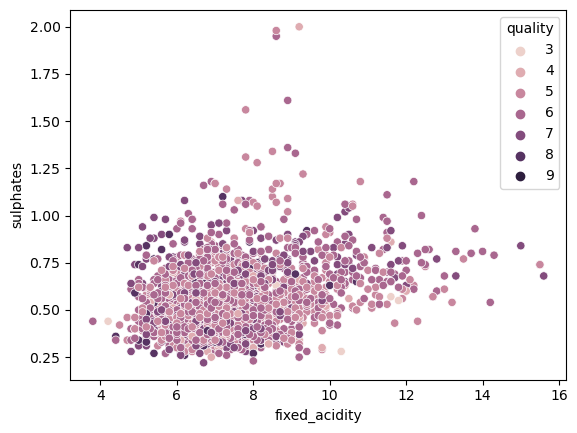

In [91]:
sns.scatterplot(train, x='fixed_acidity', y='sulphates', hue='quality')

<Axes: xlabel='fixed_acidity', ylabel='sulphates'>

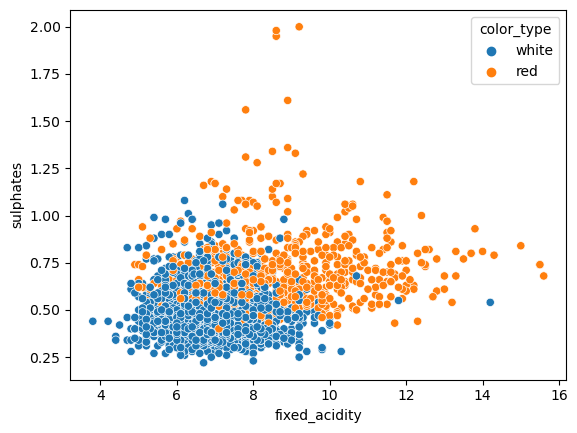

In [92]:
sns.scatterplot(train, x='fixed_acidity', y='sulphates', hue='color_type')

In [93]:
explore_cols = ['quality', 'alcohol', 'density', 'color_type']

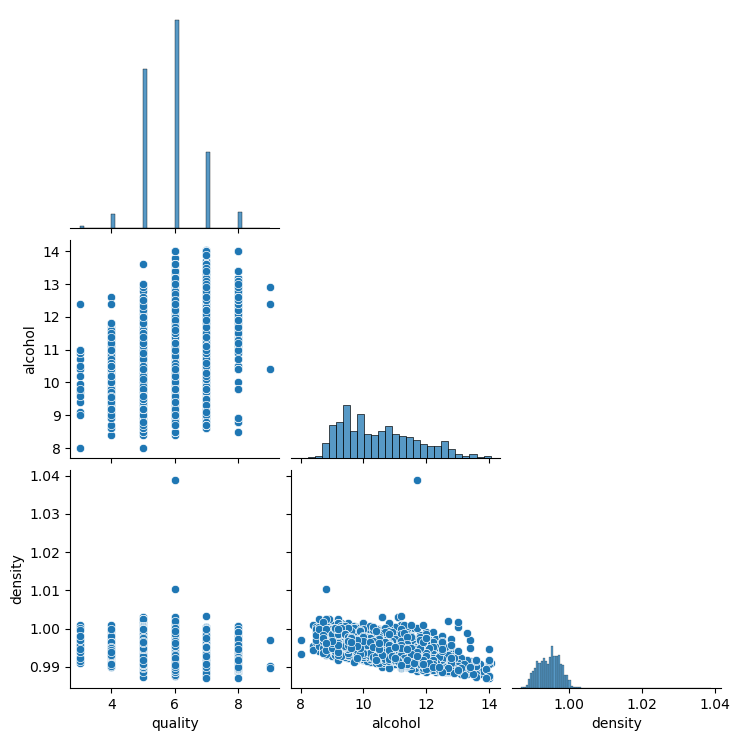

In [94]:
sns.pairplot(data=train[explore_cols], corner=True)

Does alcohol content determine the quality?

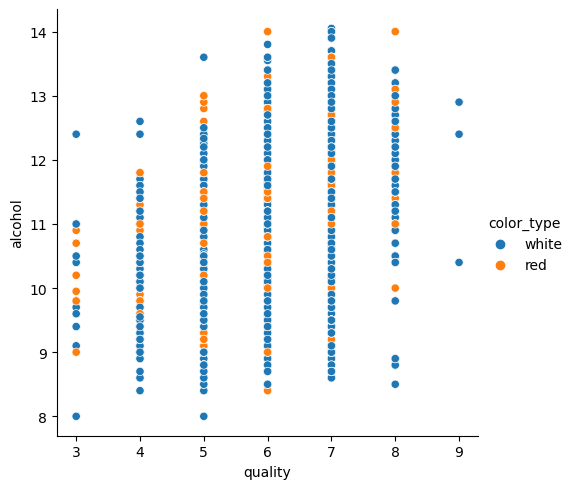

In [95]:
sns.relplot(train, x='quality', y='alcohol', hue='color_type')

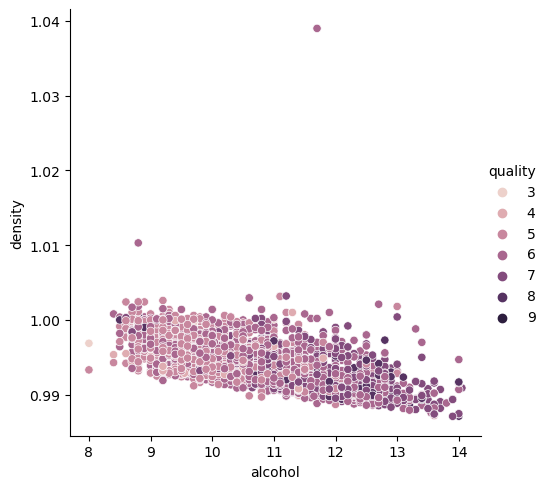

In [96]:
sns.relplot(train, x = 'alcohol', y= 'density', hue='quality')

In [97]:
import plotly.express as px

In [152]:
# Create the scatter plot with animation
fig = px.scatter(train.sort_values("quality"), x="alcohol", y="density", animation_frame="quality", color='color_type')

# Show the plot
fig.show()

It appears that having a lower density has a higher quality rating

In [99]:
train.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color_type'],
      dtype='object')

<Axes: xlabel='residual_sugar', ylabel='citric_acid'>

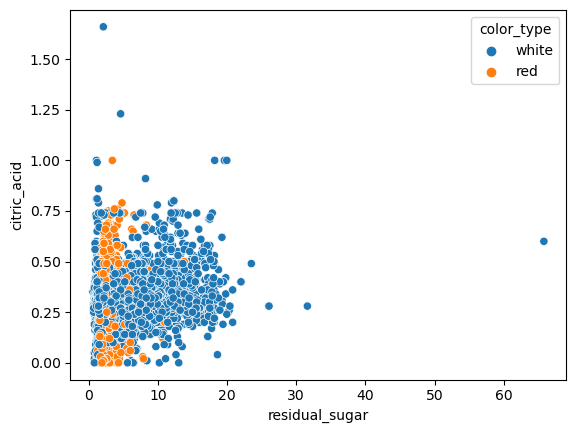

In [100]:
# residual sugar and quality
sns.scatterplot(train, x='residual_sugar', y='citric_acid', hue='color_type')

In [101]:
train['r_sugar'] = pd.cut(train.residual_sugar, [0,10,20,30, 70], labels=['10_and_under', '11_to_20', '21_to_30', 'over_30'])

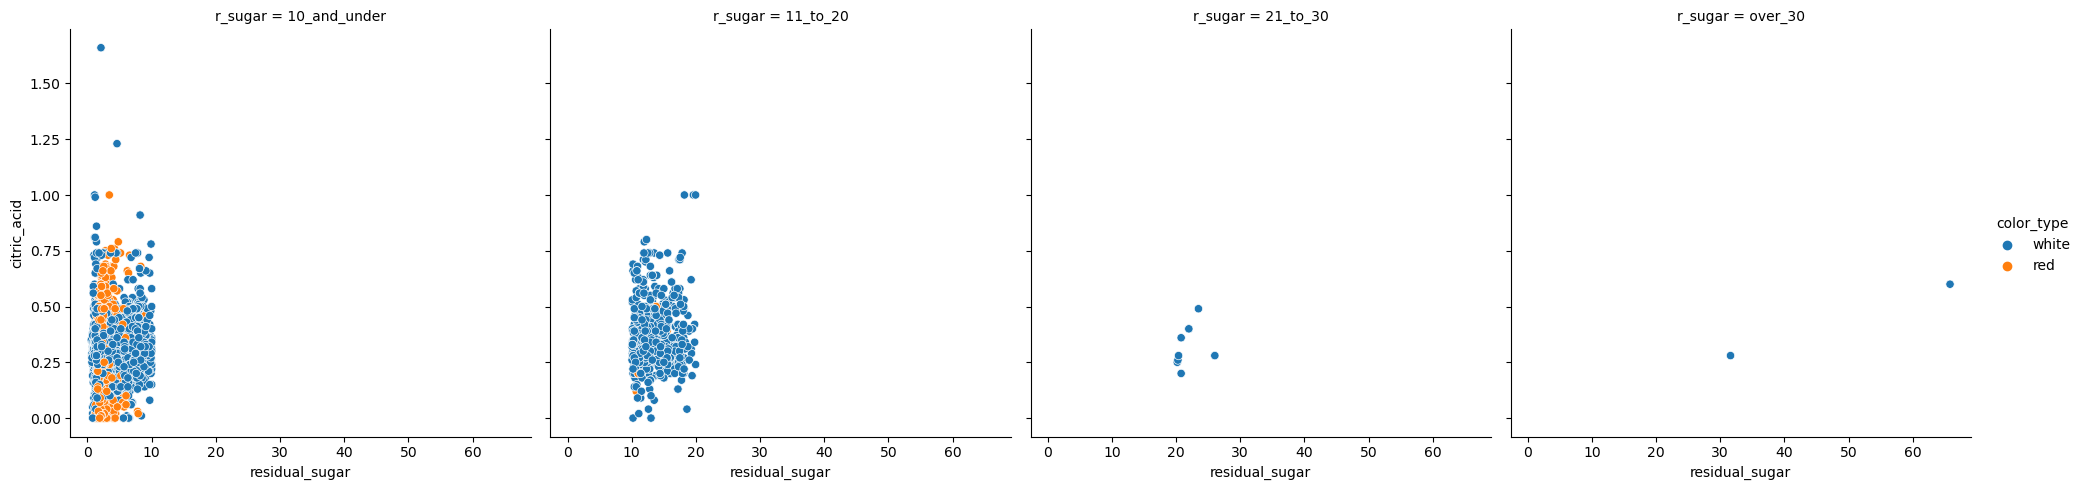

In [102]:
sns.relplot(train, x='residual_sugar', y='citric_acid', col='r_sugar', hue='color_type')

Doesnt say much


In [103]:
explore_cols = ['alcohol', 'citric_acid', 'free_sulfur_dioxide']

In [104]:
train.shape

(3897, 14)

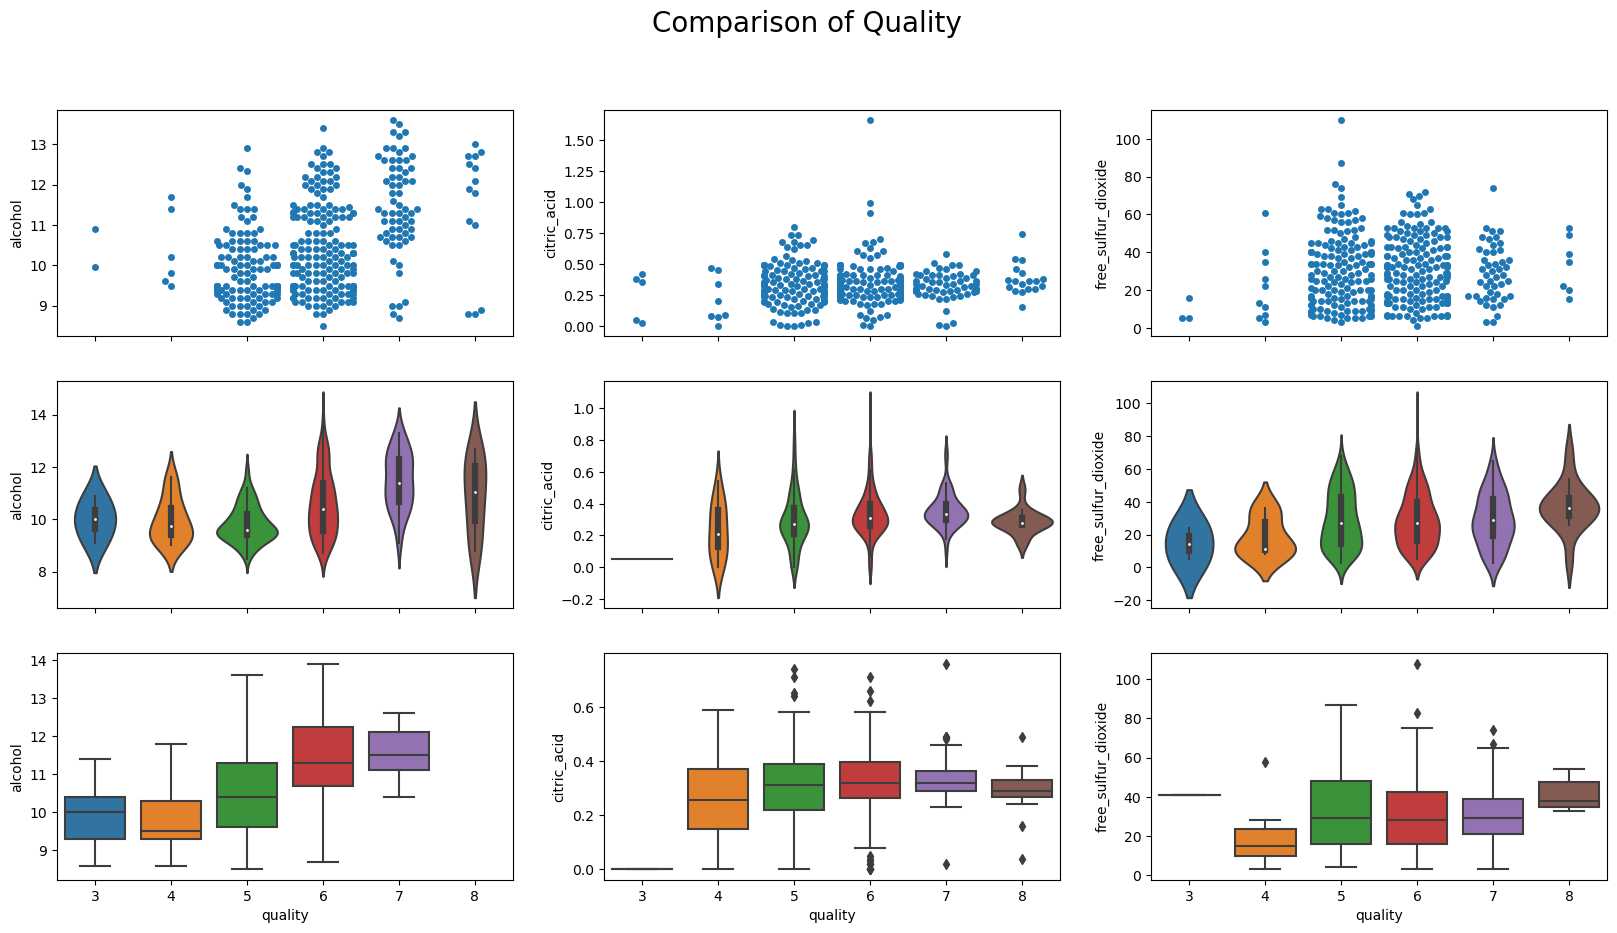

In [105]:
# looking at quality as a split along the continuous features:
fig, axs = plt.subplots(3,3, figsize=(20,10), sharex=True)
fig.suptitle('Comparison of Quality', fontsize=20)
for ax, col in zip(axs[0], explore_cols):
    sns.swarmplot(data=train.sample(370), x='quality',y=col, ax=ax)
    ax.set_xlabel(None)
for ax, col in zip(axs[1], explore_cols):
    sns.violinplot(data=train.sample(370), x='quality',y=col, ax=ax)
    ax.set_xlabel(None)
for ax, col in zip(axs[2], explore_cols):
    sns.boxplot(data=train.sample(370), x='quality',y=col, ax=ax)
plt.show()

- More alcohol content better quality
- Citric Acid means for quality over 4 appear to be equal
- free_sulfur_dioxide means for quality over 4 appear to be equal

## Modeling

In [106]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color_type,r_sugar
3353,7.4,0.230,0.25,1.4,0.049,43.0,141.0,0.99340,3.42,0.54,10.2,7,white,10_and_under
2032,7.4,0.155,0.34,2.3,0.045,73.5,214.0,0.99340,3.18,0.61,9.9,7,white,10_and_under
6223,6.4,0.400,0.25,4.2,0.032,15.0,91.0,0.98988,3.26,0.52,13.1,6,white,10_and_under
2817,8.2,0.370,0.36,1.0,0.034,17.0,93.0,0.99060,3.04,0.32,11.7,8,white,10_and_under
1293,5.9,0.395,0.13,2.4,0.056,14.0,28.0,0.99362,3.62,0.67,12.4,6,red,10_and_under


Drop r_sugar, color_type after creating dummy

In [107]:
dummy_df = pd.get_dummies(train.color_type, dtype=int, drop_first=True)
train = pd.concat([train, dummy_df], axis=1)

dummy_df = pd.get_dummies(validate.color_type, dtype=int, drop_first=True)
validate = pd.concat([validate, dummy_df], axis=1)

dummy_df = pd.get_dummies(test.color_type, dtype=int, drop_first=True)
test = pd.concat([test, dummy_df], axis=1)

In [108]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color_type,r_sugar,white
3353,7.4,0.230,0.25,1.4,0.049,43.0,141.0,0.99340,3.42,0.54,10.2,7,white,10_and_under,1
2032,7.4,0.155,0.34,2.3,0.045,73.5,214.0,0.99340,3.18,0.61,9.9,7,white,10_and_under,1
6223,6.4,0.400,0.25,4.2,0.032,15.0,91.0,0.98988,3.26,0.52,13.1,6,white,10_and_under,1
2817,8.2,0.370,0.36,1.0,0.034,17.0,93.0,0.99060,3.04,0.32,11.7,8,white,10_and_under,1
1293,5.9,0.395,0.13,2.4,0.056,14.0,28.0,0.99362,3.62,0.67,12.4,6,red,10_and_under,0


In [109]:
train.drop(columns='r_sugar', inplace=True)

In [110]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color_type,white
3353,7.4,0.230,0.25,1.4,0.049,43.0,141.0,0.99340,3.42,0.54,10.2,7,white,1
2032,7.4,0.155,0.34,2.3,0.045,73.5,214.0,0.99340,3.18,0.61,9.9,7,white,1
6223,6.4,0.400,0.25,4.2,0.032,15.0,91.0,0.98988,3.26,0.52,13.1,6,white,1
2817,8.2,0.370,0.36,1.0,0.034,17.0,93.0,0.99060,3.04,0.32,11.7,8,white,1
1293,5.9,0.395,0.13,2.4,0.056,14.0,28.0,0.99362,3.62,0.67,12.4,6,red,0


In [111]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,3897.0,7.234129,1.313032,3.80000,6.4000,7.00000,7.700,15.60000
volatile_acidity,3897.0,0.340095,0.165421,0.08000,0.2300,0.29000,0.410,1.58000
citric_acid,3897.0,0.318917,0.147739,0.00000,0.2500,0.31000,0.390,1.66000
residual_sugar,3897.0,5.535053,4.823770,0.60000,1.8000,3.20000,8.200,65.80000
chlorides,3897.0,0.056230,0.035668,0.01200,0.0380,0.04700,0.065,0.61000
free_sulfur_dioxide,3897.0,30.737875,17.564658,1.00000,17.0000,29.00000,42.000,146.50000
total_sulfur_dioxide,3897.0,115.735181,56.625317,6.00000,77.0000,118.00000,156.000,366.50000
density,3897.0,0.994757,0.003026,0.98711,0.9924,0.99498,0.997,1.03898
pH,3897.0,3.217834,0.162574,2.72000,3.1100,3.21000,3.320,3.90000
sulphates,3897.0,0.531878,0.152536,0.22000,0.4300,0.51000,0.600,2.00000


In [112]:
validate.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color_type,white
2096,7.2,0.40,0.62,10.8,0.041,70.0,189.0,0.99760,3.08,0.49,8.6,4,white,1
813,10.8,0.45,0.33,2.5,0.099,20.0,38.0,0.99818,3.24,0.71,10.8,5,red,0
741,9.2,0.53,0.24,2.6,0.078,28.0,139.0,0.99788,3.21,0.57,9.5,5,red,0
2038,6.2,0.35,0.04,1.2,0.060,23.0,108.0,0.99340,3.26,0.54,9.2,5,white,1
200,9.6,0.32,0.47,1.4,0.056,9.0,24.0,0.99695,3.22,0.82,10.3,7,red,0


Need to scale data, going to use robust

In [113]:
# We'll do exploration and train our model on the train data
X_train = train.drop(columns=["quality"])
y_train = train["quality"]

# We tune our model on validate, since it will be out-of-sample until we use it.
X_validate = validate.drop(columns=["quality"])
y_validate = validate["quality"]

# Keep the test separate, for our final out-of-sample dataset, to see how well our tuned model performs on new data.
X_test = test.drop(columns=["quality"])
y_test = test["quality"]

In [114]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [115]:
check_columns(train)

Total rows: 3897
Total columns: 14


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,fixed_acidity,float64,100,0,0.0,"[7.4, 6.4, 8.2, 5.9, 6.5, 8.6, 9.0, 13.3, 6.1,...","[3.8, 15.6, 7.234128817038748]"
1,volatile_acidity,float64,167,0,0.0,"[0.23, 0.155, 0.4, 0.37, 0.395, 0.28, 0.58, 0....","[0.08, 1.58, 0.34009494482935587]"
2,citric_acid,float64,87,0,0.0,"[0.25, 0.34, 0.36, 0.13, 0.33, 0.52, 0.3, 0.15...","[0.0, 1.66, 0.3189171157300488]"
3,residual_sugar,float64,286,0,0.0,"[1.4, 2.3, 4.2, 1.0, 2.4, 16.3, 15.7, 11.3, 2....","[0.6, 65.8, 5.535052604567616]"
4,chlorides,float64,185,0,0.0,"[0.049, 0.045, 0.032, 0.034, 0.056, 0.038, 0.0...","[0.012, 0.61, 0.05623043366692329]"
5,free_sulfur_dioxide,float64,115,0,0.0,"[43.0, 73.5, 15.0, 17.0, 14.0, 51.0, 13.0, 9.0...","[1.0, 146.5, 30.737875288683604]"
6,total_sulfur_dioxide,float64,259,0,0.0,"[141.0, 214.0, 91.0, 93.0, 28.0, 133.0, 190.0,...","[6.0, 366.5, 115.73518090839107]"
7,density,float64,872,0,0.0,"[0.9934, 0.98988, 0.9906, 0.99362, 0.99924, 0....","[0.98711, 1.03898, 0.9947569540672312]"
8,pH,float64,103,0,0.0,"[3.42, 3.18, 3.26, 3.04, 3.62, 3.22, 3.11, 3.2...","[2.72, 3.9, 3.217834231460098]"
9,sulphates,float64,104,0,0.0,"[0.54, 0.61, 0.52, 0.32, 0.67, 0.41, 0.51, 0.4...","[0.22, 2.0, 0.5318783679753658]"


In [116]:
correlation = train.drop(columns='color_type').corr()
print(correlation["quality"].sort_values(ascending=False), "\n")

quality                 1.000000
alcohol                 0.453834
white                   0.130183
citric_acid             0.085328
free_sulfur_dioxide     0.052487
sulphates               0.035410
pH                      0.015529
residual_sugar         -0.029424
total_sulfur_dioxide   -0.034306
fixed_acidity          -0.073633
chlorides              -0.204365
volatile_acidity       -0.272942
density                -0.305523
Name: quality, dtype: float64 



Going to scale every continous feature

In [117]:
X_test.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,color_type,white
1321,5.0,0.74,0.00,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,red,0
2767,7.4,0.23,0.43,1.4,0.044,22.0,113.0,0.99380,3.22,0.62,10.6,white,1
5069,6.6,0.24,0.27,10.3,0.047,54.0,219.0,0.99742,3.04,0.45,8.8,white,1
5780,6.5,0.31,0.61,13.0,0.053,31.0,123.0,0.99708,3.09,0.50,9.3,white,1
547,10.6,0.31,0.49,2.5,0.067,6.0,21.0,0.99870,3.26,0.86,10.7,red,0


In [118]:
X_train.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'color_type', 'white'],
      dtype='object')

In [119]:
def model_prep_wine_scaled(X_train, X_validate, X_test):
    '''Takes the X train, validate, and test and fits them to a RobustScaler
    
    arguments: X_train, X_validate, X_test
    
    returns: X_train_scaled, X_validate_scaled, X_test_scaled'''
    # makes a copy of the dataframes
    X_train_scaled = X_train.copy()
    X_valid_scaled = X_validate.copy()
    X_test_scaled = X_test.copy()

    columns_to_scale = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

    scaler = RobustScaler()

    X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
    X_valid_scaled[columns_to_scale] = scaler.transform(X_validate[columns_to_scale])
    X_test_scaled[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

    return X_train_scaled, X_valid_scaled, X_test_scaled

In [120]:
X_train_scaled, X_valid_scaled, X_test_scaled = model_prep_wine_scaled(X_train, X_validate, X_test)

In [121]:
X_train_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,color_type,white
3353,0.307692,-0.333333,-0.428571,-0.281250,0.074074,0.56,0.291139,-0.343478,1.000000,0.176471,-0.055556,white,1
2032,0.307692,-0.750000,0.214286,-0.140625,-0.074074,1.78,1.215190,-0.343478,-0.142857,0.588235,-0.222222,white,1
6223,-0.461538,0.611111,-0.428571,0.156250,-0.555556,-0.56,-0.341772,-1.108696,0.238095,0.058824,1.555556,white,1
2817,0.923077,0.444444,0.357143,-0.343750,-0.481481,-0.48,-0.316456,-0.952174,-0.809524,-1.117647,0.777778,white,1
1293,-0.846154,0.583333,-1.285714,-0.125000,0.333333,-0.60,-1.139241,-0.295652,1.952381,0.941176,1.166667,red,0


Going to use alcohol, white, and citric_acid for features

In [122]:
X = X_train_scaled[['alcohol', 'white', 'citric_acid']]
X.head()

,alcohol,white,citric_acid
3353,-0.055556,1,-0.428571
2032,-0.222222,1,0.214286
6223,1.555556,1,-0.428571
2817,0.777778,1,0.357143
1293,1.166667,0,-1.285714


In [123]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [124]:
# kmeans = KMeans(n_clusters=3)
# kmeans.fit(X)

# clusters = kmeans.predict(X)
# clusters

In [125]:
# X_train_scaled['cluster'] = clusters

In [126]:
X_train_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,color_type,white
3353,0.307692,-0.333333,-0.428571,-0.281250,0.074074,0.56,0.291139,-0.343478,1.000000,0.176471,-0.055556,white,1
2032,0.307692,-0.750000,0.214286,-0.140625,-0.074074,1.78,1.215190,-0.343478,-0.142857,0.588235,-0.222222,white,1
6223,-0.461538,0.611111,-0.428571,0.156250,-0.555556,-0.56,-0.341772,-1.108696,0.238095,0.058824,1.555556,white,1
2817,0.923077,0.444444,0.357143,-0.343750,-0.481481,-0.48,-0.316456,-0.952174,-0.809524,-1.117647,0.777778,white,1
1293,-0.846154,0.583333,-1.285714,-0.125000,0.333333,-0.60,-1.139241,-0.295652,1.952381,0.941176,1.166667,red,0


In [127]:
plt.figure(figsize=(5, 5))

for cluster_n in X_train_scaled.cluster.sort_values().unique():
    plt.scatter(X_train_scaled[X_train_scaled.cluster == cluster_n].alcohol, X_train_scaled[X_train_scaled.cluster == cluster_n].citric_acid, label=f'cluster_{cluster_n}')

plt.legend()
plt.title("K-Means Clusters")
plt.show()

AttributeError: 'DataFrame' object has no attribute 'cluster'

<Figure size 500x500 with 0 Axes>

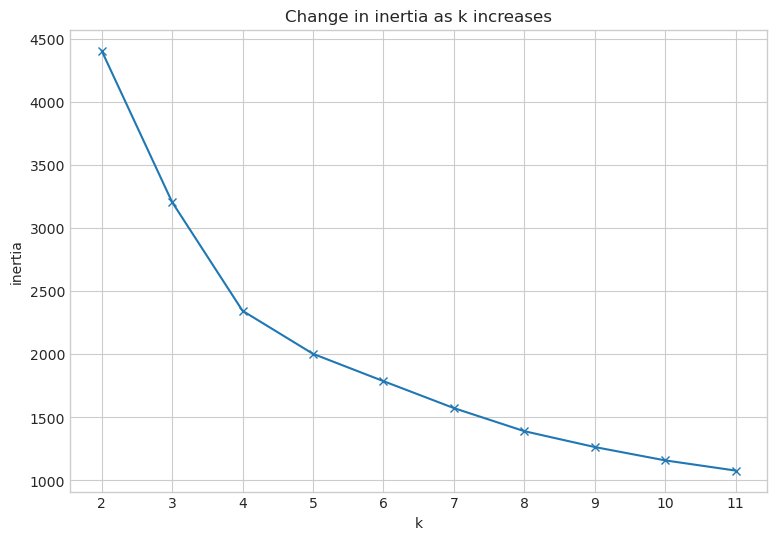

In [128]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

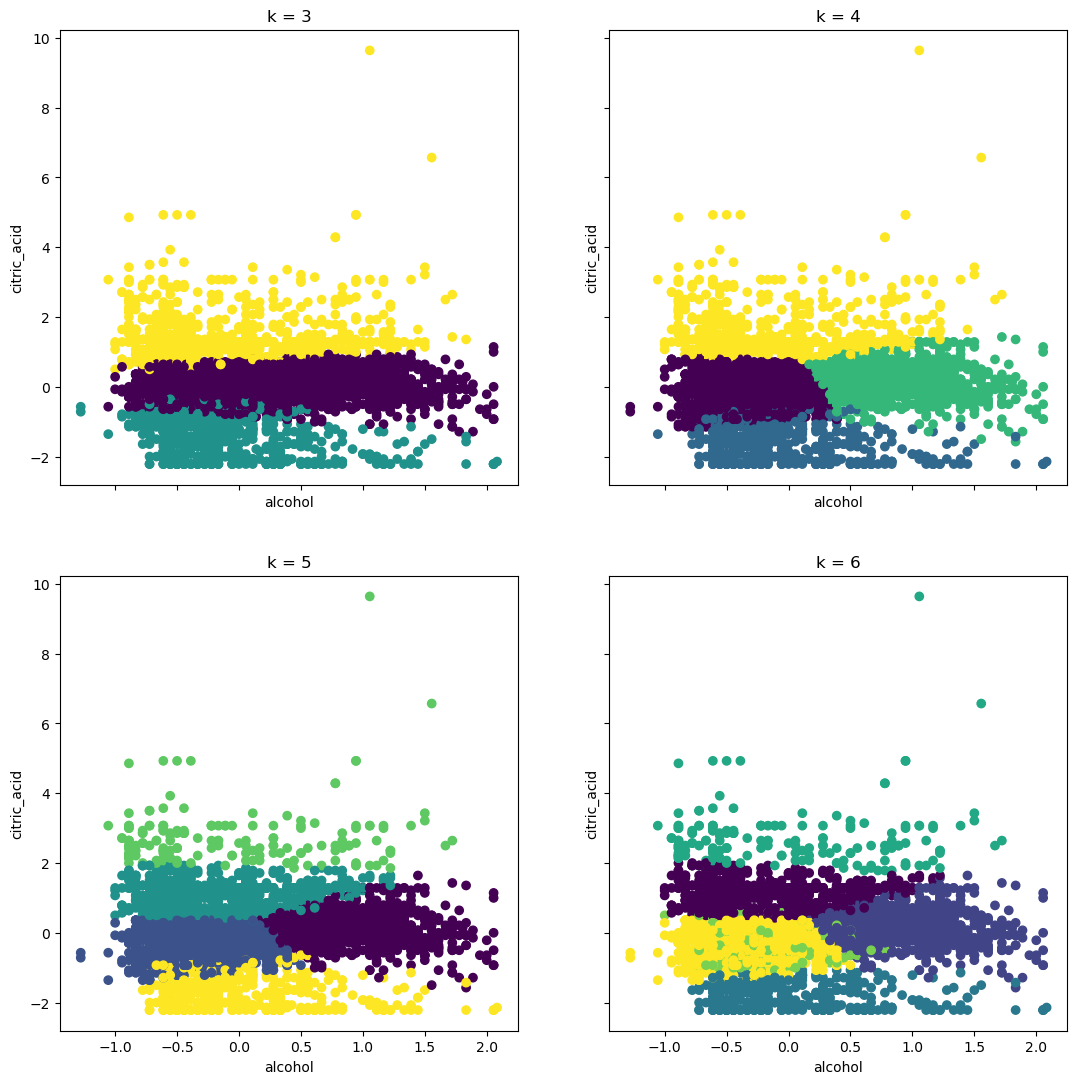

In [129]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(3, 7)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.alcohol, X.citric_acid, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='alcohol', ylabel='citric_acid')

## Now I'm Modeling

In [130]:
baseline = round(y_train.mean())
baseline

6

In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


def cluster_and_model(X_train, y_train, X_validate, y_validate, n_clusters=5):
    """
    Clusters the data using KMeans with the given number of clusters, adds the cluster labels to the original data,
    and trains and evaluates RandomForestClassifier, KNeighborsClassifier, LogisticRegression, and DecisionTreeClassifier
    models on the data.

    Parameters:
    X_train (pandas.DataFrame): The training data to cluster and model.
    y_train (pandas.Series): The training target variable.
    X_validate (pandas.DataFrame): The validation data to cluster and model.
    y_validate (pandas.Series): The validation target variable.
    n_clusters (int): The number of clusters to use for KMeans clustering.

    Returns:
    scores_df (pandas.DataFrame): A DataFrame of classification reports for each model.
    """
    # Scale the data
    # scaler = StandardScaler()
    # X_train_scaled = scaler.fit_transform(X_train)
    # X_validate_scaled = scaler.transform(X_validate)

    # Cluster the data using KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=123)
    kmeans.fit(X_train)
    X_train_clustered = kmeans.transform(X_train)
    X_validate_clustered = kmeans.transform(X_validate)

    # Add the cluster labels to the original data
    X_train_clustered_df = pd.DataFrame(
        X_train_clustered, columns=[f"cluster_{i}" for i in range(n_clusters)]
    )
    X_train_clustered_df.index = X_train.index
    X_train_clustered_df = pd.concat([X_train, X_train_clustered_df], axis=1)

    X_validate_clustered_df = pd.DataFrame(
        X_validate_clustered, columns=[f"cluster_{i}" for i in range(n_clusters)]
    )
    X_validate_clustered_df.index = X_validate.index
    X_validate_clustered_df = pd.concat([X_validate, X_validate_clustered_df], axis=1)

    # Train and evaluate models
    models = [
        RandomForestClassifier(),
        KNeighborsClassifier(),
        LogisticRegression(),
        DecisionTreeClassifier(),
    ]
    scores = dict()

    baseline_acc = accuracy_score(y_train, [y_train[0].mean()] * len(y_train))

    for m in models:
        m.fit(X_train_clustered_df, y_train)
        y_train_pred = m.predict(X_train_clustered_df)
        y_validate_pred = m.predict(X_validate_clustered_df)

        report_train = classification_report(y_train, y_train_pred, output_dict=True)
        report_validate = classification_report(
            y_validate, y_validate_pred, output_dict=True
        )

        scores[str(m)] = {
            "acc_train": accuracy_score(y_train, y_train_pred),
            "acc_validate": accuracy_score(y_validate, y_validate_pred),
            "prec_train": report_train["weighted avg"]["precision"],
            "prec_validate": report_validate["weighted avg"]["precision"],
            "recall_train": report_train["weighted avg"]["recall"],
            "recall_validate": report_validate["weighted avg"]["recall"],
            "f1_train": report_train["weighted avg"]["f1-score"],
            "f1_validate": report_validate["weighted avg"]["f1-score"],
            "supp_train": report_train["weighted avg"]["support"],
            "supp_validate": report_validate["weighted avg"]["support"],
        }
    
    
    scores['Baseline'] = {'acc_train': baseline_acc, 'acc_validate': baseline_acc}
    scores_df = pd.DataFrame(scores).transpose()
    scores_df.index.name = "Model"

    return scores_df

In [148]:
cluster_and_model(X_train_scaled.drop(columns='color_type'), y_train, X_valid_scaled.drop(columns='color_type'), y_validate, n_clusters=3)

,acc_train,acc_validate,prec_train,prec_validate,recall_train,recall_validate,f1_train,f1_validate,supp_train,supp_validate
Model,,,,,,,,,,
RandomForestClassifier(),1.000000,0.666923,1.000000,0.648860,1.000000,0.666923,1.000000,0.647338,3897.0,1300.0
KNeighborsClassifier(),0.690018,0.549231,0.685250,0.529548,0.690018,0.549231,0.679351,0.534180,3897.0,1300.0
LogisticRegression(),0.556582,0.542308,0.535995,0.538192,0.556582,0.542308,0.522490,0.504803,3897.0,1300.0
DecisionTreeClassifier(),1.000000,0.572308,1.000000,0.571395,1.000000,0.572308,1.000000,0.571071,3897.0,1300.0
Baseline,0.335386,0.335386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
cluster_and_model(X_train_scaled.drop(columns='color_type'), y_train, X_valid_scaled.drop(columns='color_type'), y_validate, n_clusters=4)

,acc_train,acc_validate,prec_train,prec_validate,recall_train,recall_validate,f1_train,f1_validate,supp_train,supp_validate
Model,,,,,,,,,,
RandomForestClassifier(),1.000000,0.670000,1.000000,0.664044,1.000000,0.670000,1.000000,0.651358,3897.0,1300.0
KNeighborsClassifier(),0.692584,0.553846,0.688798,0.535410,0.692584,0.553846,0.682111,0.539611,3897.0,1300.0
LogisticRegression(),0.554273,0.539231,0.528711,0.511176,0.554273,0.539231,0.523456,0.505050,3897.0,1300.0
DecisionTreeClassifier(),1.000000,0.575385,1.000000,0.576432,1.000000,0.575385,1.000000,0.574936,3897.0,1300.0
Baseline,0.335386,0.335386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
cluster_and_model(X_train_scaled.drop(columns='color_type'), y_train, X_valid_scaled.drop(columns='color_type'), y_validate, n_clusters=5)

,acc_train,acc_validate,prec_train,prec_validate,recall_train,recall_validate,f1_train,f1_validate,supp_train,supp_validate
Model,,,,,,,,,,
RandomForestClassifier(),1.000000,0.667692,1.000000,0.659621,1.000000,0.667692,1.000000,0.648776,3897.0,1300.0
KNeighborsClassifier(),0.689505,0.552308,0.686077,0.533736,0.689505,0.552308,0.678786,0.537570,3897.0,1300.0
LogisticRegression(),0.558891,0.546154,0.529011,0.539668,0.558891,0.546154,0.526024,0.510500,3897.0,1300.0
DecisionTreeClassifier(),1.000000,0.581538,1.000000,0.584278,1.000000,0.581538,1.000000,0.581763,3897.0,1300.0
Baseline,0.335386,0.335386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
cluster_and_model(X_train_scaled.drop(columns='color_type'), y_train, X_valid_scaled.drop(columns='color_type'), y_validate, n_clusters=6)

,acc_train,acc_validate,prec_train,prec_validate,recall_train,recall_validate,f1_train,f1_validate,supp_train,supp_validate
Model,,,,,,,,,,
RandomForestClassifier(),1.000000,0.677692,1.000000,0.663908,1.000000,0.677692,1.000000,0.657411,3897.0,1300.0
KNeighborsClassifier(),0.683603,0.540000,0.679183,0.523384,0.683603,0.540000,0.673155,0.526545,3897.0,1300.0
LogisticRegression(),0.559148,0.550769,0.529227,0.544710,0.559148,0.550769,0.525460,0.514513,3897.0,1300.0
DecisionTreeClassifier(),1.000000,0.596923,1.000000,0.592011,1.000000,0.596923,1.000000,0.593507,3897.0,1300.0
Baseline,0.335386,0.335386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
X_train_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,color_type,white
3353,0.307692,-0.333333,-0.428571,-0.281250,0.074074,0.56,0.291139,-0.343478,1.000000,0.176471,-0.055556,white,1
2032,0.307692,-0.750000,0.214286,-0.140625,-0.074074,1.78,1.215190,-0.343478,-0.142857,0.588235,-0.222222,white,1
6223,-0.461538,0.611111,-0.428571,0.156250,-0.555556,-0.56,-0.341772,-1.108696,0.238095,0.058824,1.555556,white,1
2817,0.923077,0.444444,0.357143,-0.343750,-0.481481,-0.48,-0.316456,-0.952174,-0.809524,-1.117647,0.777778,white,1
1293,-0.846154,0.583333,-1.285714,-0.125000,0.333333,-0.60,-1.139241,-0.295652,1.952381,0.941176,1.166667,red,0


In [150]:
cluster_and_model(X_train_scaled.drop(columns='color_type'), y_train, X_test_scaled.drop(columns='color_type'), y_test, n_clusters=6)

,acc_train,acc_validate,prec_train,prec_validate,recall_train,recall_validate,f1_train,f1_validate,supp_train,supp_validate
Model,,,,,,,,,,
RandomForestClassifier(),1.000000,0.646154,1.000000,0.655187,1.000000,0.646154,1.000000,0.630269,3897.0,1300.0
KNeighborsClassifier(),0.683603,0.540000,0.679183,0.527420,0.683603,0.540000,0.673155,0.529191,3897.0,1300.0
LogisticRegression(),0.559148,0.519231,0.529227,0.529117,0.559148,0.519231,0.525460,0.484251,3897.0,1300.0
DecisionTreeClassifier(),1.000000,0.552308,1.000000,0.552052,1.000000,0.552308,1.000000,0.550963,3897.0,1300.0
Baseline,0.335386,0.335386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
